# Fecha de entrega: 24/09/2022 (corresponde a las clases 23/24)

# Algoritmos de boosting

# Diccionario

**BTC_ind_trend_ET_fv** (data set "BTC_ind_trend_ET" reducido según las conclusiones referidas en el punto 7 del documento "Primera entrega")

* Date: fecha en YYYY-MM-DD (object)
* Price: precio de cierre de BTC en el día de la fecha (USD) (float) (Variable numérica continua)
* Open: precio de apertura de BTC en el día de la fecha (USD) (float) (Variable numérica continua)
* High: precio más alto de BTC en el día de la fecha (USD) (float) (Variable numérica continua)
* Low: precio más bajo de BTC en el día de la fecha (USD) (float) (Variable numérica continua)
* Vol.: volumen de BTC (Número de intercambios) en el día de la fecha (float) (Variable numérica continua)
* Percentage_diff: diferencia porcentual del precio de BTC en la fecha [x+1] con respecto a la fecha [x] (float) (Variable numérica continua) 
* Target: 1 indica que en el día de la fecha el precio de BTC subió, y 0 que el precio bajó (float) (Se la tratará como variable categórica)
* EMA_7d: media móvil exponencial de 7 días (USD) (float) (Variable numérica continua)
* HT_TRENDLINE: indicador de Hilbert Transform - Instantaneous Trendline (USD) (float) (Variable numérica continua)
* BBANDS_upper_band: banda superior del indicador Bandas de Bollinger (USD) (float) (Variable numérica continua)
* BBANDS_middle_band: banda media del indicador Bandas de Bollinger (USD) (float) (Variable numérica continua)
* BBANDS_lower_band: banda inferior del indicador Bandas de Bollinger (USD) (float) (Variable numérica continua)
* PSAR: indicador Parabolic SAR (USD) (float) (Variable numérica continua)Price_silver: indica el precio de cierre de la plata en el día de la fecha (float) (USD) (variable numérica continua)
* EMA_7d_ET: valores categóricos de la aplicación de la estrategia de trading EMA de 7 días (comprar, vender, mantener posición) (object) (Variable categórica)
* HT_TRENDLINE_ET: valores categóricos de la aplicación de la estrategia de trading HT Trendline (comprar, vender, mantener posición) (object) (Variable categórica)
* PSAR_ET: valores categóricos de la aplicación de la estrategia de trading PSAR (comprar, vender, mantener posición) (object) (Variable categórica)
* Trend: tendencia de la variable "Price" a lo largo de la serie de tiempo (USD) (Variable categórica continua)
* Residuals: residualidad de la variable "Price" a lo largo de la serie de tiempo (unidad) (Variable categórica continua)

# Librerías

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import plotly.express as px
import seaborn as sns
import pandas_profiling
import statsmodels.api as sm
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_acf
from matplotlib.cm import ScalarMappable

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set_style('darkgrid')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

C:\Users\lucia\anaconda3\envs\acjup\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\lucia\anaconda3\envs\acjup\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


# Data acquisition

In [2]:
def gdriveColabPath(sharing_url):
  file_id=sharing_url.split('/')[-2]
  dwn_url='https://drive.google.com/uc?id=' + file_id
  return dwn_url

## Adquiriendo BTC_ind_trend_ET_fv

In [3]:
# Se carga la base de datos de BTC_ind_trend_ET_fv desde la carpeta compartida en el Google Drive
sharing_url = "https://drive.google.com/file/d/1P7EPcqZ-CGRcTPqhk1BE9KZNTdysCr4A/view?usp=sharing"

In [4]:
dwn_url=gdriveColabPath(sharing_url)
BTC_ind_trend_fv_df = pd.read_csv(dwn_url, sep=";", decimal=".")
BTC_ind_trend_fv_df.head()

Date  Price  Open  High  Low    Vol.  Percentage_diff  Target  \
0  2010-07-18    0.1   0.0   0.1  0.1    80.0              0.0     0.0   
1  2010-07-19    0.1   0.1   0.1  0.1   570.0              0.0     0.0   
2  2010-07-20    0.1   0.1   0.1  0.1   260.0              0.0     0.0   
3  2010-07-21    0.1   0.1   0.1  0.1   580.0              0.0     0.0   
4  2010-07-22    0.1   0.1   0.1  0.1  2160.0              0.0     0.0   

   EMA_7d  HT_TRENDLINE  BBANDS_upper_band  BBANDS_middle_band  \
0     NaN           NaN                NaN                 NaN   
1     NaN           NaN                NaN                 NaN   
2     NaN           NaN                NaN                 NaN   
3     NaN           NaN                NaN                 NaN   
4     NaN           NaN                0.1                 0.1   

   BBANDS_lower_band  PSAR          EMA_7d_ET            HTTL_ET  \
0                NaN   NaN  Mantener_posicion  Mantener_posicion   
1                NaN   0.1  Mantener_posicion  Mantener_posicion   
2                NaN   0.1  Mantener_posicion  Mantener_posicion   
3                NaN   0.1  Mantener_posicion  Mantener_posicion   
4                0.1   0.1  Mantener_posicion  Mantener_posicion   

             PSAR_ET  Trend  Residuals  
0  Mantener_posicion    NaN        NaN  
1  Mantener_posicion    NaN        NaN  
2  Mantener_posicion    NaN        NaN  
3  Mantener_posicion    0.1 -19.575231  
4  Mantener_posicion    0.1  15.128694

# Data wrangling

## Análisis pre-modelado

In [5]:
# Registros y columnas
BTC_ind_trend_fv_df.shape

(4386, 19)

In [6]:
# Nombre de columnas
BTC_ind_trend_fv_df.columns

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Percentage_diff',
       'Target', 'EMA_7d', 'HT_TRENDLINE', 'BBANDS_upper_band',
       'BBANDS_middle_band', 'BBANDS_lower_band', 'PSAR', 'EMA_7d_ET',
       'HTTL_ET', 'PSAR_ET', 'Trend', 'Residuals'],
      dtype='object')

In [7]:
# Tipos de datos de las variables
BTC_ind_trend_fv_df.dtypes

Date                   object
Price                 float64
Open                  float64
High                  float64
Low                   float64
Vol.                  float64
Percentage_diff       float64
Target                float64
EMA_7d                float64
HT_TRENDLINE          float64
BBANDS_upper_band     float64
BBANDS_middle_band    float64
BBANDS_lower_band     float64
PSAR                  float64
EMA_7d_ET              object
HTTL_ET                object
PSAR_ET                object
Trend                 float64
Residuals             float64
dtype: object

In [8]:
# Columnas y cantidad de registros
BTC_ind_trend_fv_df.count()

Date                  4386
Price                 4386
Open                  4386
High                  4386
Low                   4386
Vol.                  4386
Percentage_diff       4386
Target                4386
EMA_7d                4380
HT_TRENDLINE          4323
BBANDS_upper_band     4382
BBANDS_middle_band    4382
BBANDS_lower_band     4382
PSAR                  4385
EMA_7d_ET             4386
HTTL_ET               4386
PSAR_ET               4386
Trend                 4380
Residuals             4380
dtype: int64

In [9]:
# Valores NaN
BTC_ind_trend_fv_df.isnull().sum()

Date                   0
Price                  0
Open                   0
High                   0
Low                    0
Vol.                   0
Percentage_diff        0
Target                 0
EMA_7d                 6
HT_TRENDLINE          63
BBANDS_upper_band      4
BBANDS_middle_band     4
BBANDS_lower_band      4
PSAR                   1
EMA_7d_ET              0
HTTL_ET                0
PSAR_ET                0
Trend                  6
Residuals              6
dtype: int64

In [10]:
BTC_ind_trend_fv_df.head(10)

Date  Price  Open  High  Low    Vol.  Percentage_diff  Target  \
0  2010-07-18    0.1   0.0   0.1  0.1    80.0              0.0     0.0   
1  2010-07-19    0.1   0.1   0.1  0.1   570.0              0.0     0.0   
2  2010-07-20    0.1   0.1   0.1  0.1   260.0              0.0     0.0   
3  2010-07-21    0.1   0.1   0.1  0.1   580.0              0.0     0.0   
4  2010-07-22    0.1   0.1   0.1  0.1  2160.0              0.0     0.0   
5  2010-07-23    0.1   0.1   0.1  0.1  2400.0              0.0     0.0   
6  2010-07-24    0.1   0.1   0.1  0.1   500.0              0.0     0.0   
7  2010-07-25    0.1   0.1   0.1  0.1  1550.0              0.0     0.0   
8  2010-07-26    0.1   0.1   0.1  0.1   880.0              0.0     0.0   
9  2010-07-27    0.1   0.1   0.1  0.1  3370.0              0.0     0.0   

   EMA_7d  HT_TRENDLINE  BBANDS_upper_band  BBANDS_middle_band  \
0     NaN           NaN                NaN                 NaN   
1     NaN           NaN                NaN                 NaN   
2     NaN           NaN                NaN                 NaN   
3     NaN           NaN                NaN                 NaN   
4     NaN           NaN                0.1                 0.1   
5     NaN           NaN                0.1                 0.1   
6     0.1           NaN                0.1                 0.1   
7     0.1           NaN                0.1                 0.1   
8     0.1           NaN                0.1                 0.1   
9     0.1           NaN                0.1                 0.1   

   BBANDS_lower_band  PSAR          EMA_7d_ET            HTTL_ET  \
0                NaN   NaN  Mantener_posicion  Mantener_posicion   
1                NaN   0.1  Mantener_posicion  Mantener_posicion   
2                NaN   0.1  Mantener_posicion  Mantener_posicion   
3                NaN   0.1  Mantener_posicion  Mantener_posicion   
4                0.1   0.1  Mantener_posicion  Mantener_posicion   
5                0.1   0.1  Mantener_posicion  Mantener_posicion   
6                0.1   0.1  Mantener_posicion  Mantener_posicion   
7                0.1   0.1  Mantener_posicion  Mantener_posicion   
8                0.1   0.1  Mantener_posicion  Mantener_posicion   
9                0.1   0.1  Mantener_posicion  Mantener_posicion   

             PSAR_ET  Trend  Residuals  
0  Mantener_posicion    NaN        NaN  
1  Mantener_posicion    NaN        NaN  
2  Mantener_posicion    NaN        NaN  
3  Mantener_posicion    0.1 -19.575231  
4  Mantener_posicion    0.1  15.128694  
5  Mantener_posicion    0.1  10.352268  
6  Mantener_posicion    0.1   0.183737  
7  Mantener_posicion    0.1   3.979105  
8  Mantener_posicion    0.1  -8.917886  
9  Mantener_posicion    0.1  -1.150686

Observaciones:

Se observaron varios registros NaN en "BTC_ind_trend_ET_fv.csv". 

Esto implica la necesidad de tomar una decisión con respecto a este tipo de valores (instancia previa al modelado). 

Se descarta rellenar los NaN con promedios de valores previos y/o posteriores por varias razones:

1. En las variables [Trend] y [Residuals], 3 de los 6 valores NaN se encuentran al principio de la serie, y los restantes 3 al final de la misma. Esto significa que no se puede hacer un promedio con valores anteriores y posteriores a los valores NaN sino solo con anteriores o posteriores según el caso. Proceder con un promedio con los datos anteriores o posteriores en una serie de tiempo supone un problema extra (¿cuántos valores hacia atrás o hacia adelante se deben tomar?, ¿cuál es el grado de autocorrelación con los valores anteriores o posteriores?, entre otros). 


2. En la variable [Residuals] hay valores positivos y negativos en los registros anteriores y posteriores inmediatos según el caso. Esto también añade un problema extra (¿qué signo se debería utilizar si se rellenan esos casilleros?).


3. Al no tratarse de un problema de regresión lineal del valor que tomaría el precio de BTC en el registro siguiente sino un problema de clasificación, la eliminación de los valores NaN no afectaría en demasía la predicción del modelo a pesar de la autocorrelación referida en el punto 2. Si se considera eliminar los 63 registros NaN (variable -> HT_TRENDLINE) se estarí solamente eliminando un (63*100/4386 =) 1.43 % de los datos. 

Se elieminarán los valores NaN por lo dicho arriba, sumado, además, que los modelos debajo no aceptan este tipo de valores.

## Ultimas manipulaciones pre-modelado

Se reindexa el data set que se modelará a fin de que la variable [Date] funcione como nuevo índice de la base de datos.

In [11]:
# Se crea una copia de BTC_ind_trend_fv_df con nombre BTC_ind_trend y se la reindexa con la variable [Date] como nuevo índice
BTC_ind_trend = BTC_ind_trend_fv_df.set_index("Date")

In [12]:
BTC_ind_trend.tail()

Price     Open     High      Low      Vol.  Percentage_diff  \
Date                                                                        
2022-07-16  21209.9  20825.2  21561.3  20484.4  136890.0             1.85   
2022-07-17  20785.6  21209.8  21654.4  20755.2  132810.0            -2.00   
2022-07-18  22525.8  20785.6  22714.9  20770.6  279720.0             8.37   
2022-07-19  23410.2  22529.3  23757.3  21581.8  308910.0             3.93   
2022-07-20  23149.1  23412.0  23429.9  22965.9  290210.0            -1.12   

            Target        EMA_7d  HT_TRENDLINE  BBANDS_upper_band  \
Date                                                                
2022-07-16     1.0  20679.126620  20423.078104       21714.292433   
2022-07-17     0.0  20705.744965  20403.832160       21359.693563   
2022-07-18     1.0  21160.758724  20435.796762       22585.394742   
2022-07-19     1.0  21723.119043  20547.109474       23836.570363   
2022-07-20     0.0  22079.614282  20712.814316       24304.381782   

            BBANDS_middle_band  BBANDS_lower_band          PSAR  \
Date                                                              
2022-07-16            20440.38       19166.467567  22017.409626   
2022-07-17            20731.32       20102.946437  21894.401241   
2022-07-18            21186.48       19787.565258  18942.200000   
2022-07-19            21751.32       19666.069637  19017.654000   
2022-07-20            22216.12       20127.858218  19207.239840   

                    EMA_7d_ET            HTTL_ET            PSAR_ET  \
Date                                                                  
2022-07-16  Mantener_posicion  Mantener_posicion  Mantener_posicion   
2022-07-17  Mantener_posicion  Mantener_posicion  Mantener_posicion   
2022-07-18  Mantener_posicion  Mantener_posicion            Comprar   
2022-07-19  Mantener_posicion  Mantener_posicion  Mantener_posicion   
2022-07-20  Mantener_posicion  Mantener_posicion  Mantener_posicion   

                   Trend   Residuals  
Date                                  
2022-07-16  21370.371429 -160.287691  
2022-07-17  21784.528571 -994.949467  
2022-07-18           NaN         NaN  
2022-07-19           NaN         NaN  
2022-07-20           NaN         NaN

Dado que en la práctica real solo se tiene hasta los valores del registro anterior al que se quiere predecir se intenta hacer un shift (-1) a la variable [Target]. Se entiende que así (en caso de que el modelo prediga con previsibilidad suficiente) se podría estar seguro de que después vendría el valor de [Target] original sin shift (-1).

In [13]:
# Se genera un back up
BTC_ind_trend_2 = BTC_ind_trend.copy()

In [14]:
# Se realiza el shift 
BTC_ind_trend_2 ["Target"] = BTC_ind_trend ["Target"].shift(-1)

In [15]:
BTC_ind_trend_2.tail()

Price     Open     High      Low      Vol.  Percentage_diff  \
Date                                                                        
2022-07-16  21209.9  20825.2  21561.3  20484.4  136890.0             1.85   
2022-07-17  20785.6  21209.8  21654.4  20755.2  132810.0            -2.00   
2022-07-18  22525.8  20785.6  22714.9  20770.6  279720.0             8.37   
2022-07-19  23410.2  22529.3  23757.3  21581.8  308910.0             3.93   
2022-07-20  23149.1  23412.0  23429.9  22965.9  290210.0            -1.12   

            Target        EMA_7d  HT_TRENDLINE  BBANDS_upper_band  \
Date                                                                
2022-07-16     0.0  20679.126620  20423.078104       21714.292433   
2022-07-17     1.0  20705.744965  20403.832160       21359.693563   
2022-07-18     1.0  21160.758724  20435.796762       22585.394742   
2022-07-19     0.0  21723.119043  20547.109474       23836.570363   
2022-07-20     NaN  22079.614282  20712.814316       24304.381782   

            BBANDS_middle_band  BBANDS_lower_band          PSAR  \
Date                                                              
2022-07-16            20440.38       19166.467567  22017.409626   
2022-07-17            20731.32       20102.946437  21894.401241   
2022-07-18            21186.48       19787.565258  18942.200000   
2022-07-19            21751.32       19666.069637  19017.654000   
2022-07-20            22216.12       20127.858218  19207.239840   

                    EMA_7d_ET            HTTL_ET            PSAR_ET  \
Date                                                                  
2022-07-16  Mantener_posicion  Mantener_posicion  Mantener_posicion   
2022-07-17  Mantener_posicion  Mantener_posicion  Mantener_posicion   
2022-07-18  Mantener_posicion  Mantener_posicion            Comprar   
2022-07-19  Mantener_posicion  Mantener_posicion  Mantener_posicion   
2022-07-20  Mantener_posicion  Mantener_posicion  Mantener_posicion   

                   Trend   Residuals  
Date                                  
2022-07-16  21370.371429 -160.287691  
2022-07-17  21784.528571 -994.949467  
2022-07-18           NaN         NaN  
2022-07-19           NaN         NaN  
2022-07-20           NaN         NaN

Se convierten las variables categóricas ([EMA_7d_ET], [HTTL_ET], [PSAR_ET]) en variables dummies y se agregan a BTC_ind_trend_2

In [16]:
Variables = ["EMA_7d_ET", "HTTL_ET", "PSAR_ET"]

for var in Variables:
    dummies = pd.get_dummies(BTC_ind_trend_2 [var])
    dummies = dummies.rename(columns={"Comprar":"Comprar_"+var+"", "Mantener_posicion":"Mantener_posicion_"+var+"", "Vender":"Vender_"+var+""})
    BTC_ind_trend_2 = pd.concat([BTC_ind_trend_2, dummies], axis = 1)

In [17]:
BTC_ind_trend_2.head()

Price  Open  High  Low    Vol.  Percentage_diff  Target  EMA_7d  \
Date                                                                          
2010-07-18    0.1   0.0   0.1  0.1    80.0              0.0     0.0     NaN   
2010-07-19    0.1   0.1   0.1  0.1   570.0              0.0     0.0     NaN   
2010-07-20    0.1   0.1   0.1  0.1   260.0              0.0     0.0     NaN   
2010-07-21    0.1   0.1   0.1  0.1   580.0              0.0     0.0     NaN   
2010-07-22    0.1   0.1   0.1  0.1  2160.0              0.0     0.0     NaN   

            HT_TRENDLINE  BBANDS_upper_band  BBANDS_middle_band  \
Date                                                              
2010-07-18           NaN                NaN                 NaN   
2010-07-19           NaN                NaN                 NaN   
2010-07-20           NaN                NaN                 NaN   
2010-07-21           NaN                NaN                 NaN   
2010-07-22           NaN                0.1                 0.1   

            BBANDS_lower_band  PSAR          EMA_7d_ET            HTTL_ET  \
Date                                                                        
2010-07-18                NaN   NaN  Mantener_posicion  Mantener_posicion   
2010-07-19                NaN   0.1  Mantener_posicion  Mantener_posicion   
2010-07-20                NaN   0.1  Mantener_posicion  Mantener_posicion   
2010-07-21                NaN   0.1  Mantener_posicion  Mantener_posicion   
2010-07-22                0.1   0.1  Mantener_posicion  Mantener_posicion   

                      PSAR_ET  Trend  Residuals  Comprar_EMA_7d_ET  \
Date                                                                 
2010-07-18  Mantener_posicion    NaN        NaN                  0   
2010-07-19  Mantener_posicion    NaN        NaN                  0   
2010-07-20  Mantener_posicion    NaN        NaN                  0   
2010-07-21  Mantener_posicion    0.1 -19.575231                  0   
2010-07-22  Mantener_posicion    0.1  15.128694                  0   

            Mantener_posicion_EMA_7d_ET  Vender_EMA_7d_ET  Comprar_HTTL_ET  \
Date                                                                         
2010-07-18                            1                 0                0   
2010-07-19                            1                 0                0   
2010-07-20                            1                 0                0   
2010-07-21                            1                 0                0   
2010-07-22                            1                 0                0   

            Mantener_posicion_HTTL_ET  Vender_HTTL_ET  Comprar_PSAR_ET  \
Date                                                                     
2010-07-18                          1               0                0   
2010-07-19                          1               0                0   
2010-07-20                          1               0                0   
2010-07-21                          1               0                0   
2010-07-22                          1               0                0   

            Mantener_posicion_PSAR_ET  Vender_PSAR_ET  
Date                                                   
2010-07-18                          1               0  
2010-07-19                          1               0  
2010-07-20                          1               0  
2010-07-21                          1               0  
2010-07-22                          1               0

Se eliminan las variables categóricas del BTC_ind_trend_2

In [18]:
BTC_ind_trend_2 = BTC_ind_trend_2.drop(["EMA_7d_ET", "HTTL_ET", "PSAR_ET"], axis=1)

In [19]:
BTC_ind_trend_2.columns

Index(['Price', 'Open', 'High', 'Low', 'Vol.', 'Percentage_diff', 'Target',
       'EMA_7d', 'HT_TRENDLINE', 'BBANDS_upper_band', 'BBANDS_middle_band',
       'BBANDS_lower_band', 'PSAR', 'Trend', 'Residuals', 'Comprar_EMA_7d_ET',
       'Mantener_posicion_EMA_7d_ET', 'Vender_EMA_7d_ET', 'Comprar_HTTL_ET',
       'Mantener_posicion_HTTL_ET', 'Vender_HTTL_ET', 'Comprar_PSAR_ET',
       'Mantener_posicion_PSAR_ET', 'Vender_PSAR_ET'],
      dtype='object')

Se elimina el registro NaN de la variable [Target] dado que los modelos no pueden procesar este tipo de datos

In [20]:
BTC_ind_trend_2 = BTC_ind_trend_2 [0:4385]

In [21]:
BTC_ind_trend_2.isnull().sum()

Price                           0
Open                            0
High                            0
Low                             0
Vol.                            0
Percentage_diff                 0
Target                          0
EMA_7d                          6
HT_TRENDLINE                   63
BBANDS_upper_band               4
BBANDS_middle_band              4
BBANDS_lower_band               4
PSAR                            1
Trend                           5
Residuals                       5
Comprar_EMA_7d_ET               0
Mantener_posicion_EMA_7d_ET     0
Vender_EMA_7d_ET                0
Comprar_HTTL_ET                 0
Mantener_posicion_HTTL_ET       0
Vender_HTTL_ET                  0
Comprar_PSAR_ET                 0
Mantener_posicion_PSAR_ET       0
Vender_PSAR_ET                  0
dtype: int64

Los valores NaN se deben a las fórmulas de creación de las variables en cuestión.

In [22]:
# Se eliminan todos los registro NaN (explicado arriba)
BTC_ind_trend_2 = BTC_ind_trend_2.dropna()

In [23]:
BTC_ind_trend_2.isnull().sum()

Price                          0
Open                           0
High                           0
Low                            0
Vol.                           0
Percentage_diff                0
Target                         0
EMA_7d                         0
HT_TRENDLINE                   0
BBANDS_upper_band              0
BBANDS_middle_band             0
BBANDS_lower_band              0
PSAR                           0
Trend                          0
Residuals                      0
Comprar_EMA_7d_ET              0
Mantener_posicion_EMA_7d_ET    0
Vender_EMA_7d_ET               0
Comprar_HTTL_ET                0
Mantener_posicion_HTTL_ET      0
Vender_HTTL_ET                 0
Comprar_PSAR_ET                0
Mantener_posicion_PSAR_ET      0
Vender_PSAR_ET                 0
dtype: int64

In [24]:
BTC_ind_trend_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4320 entries, 2010-09-19 to 2022-07-17
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Price                        4320 non-null   float64
 1   Open                         4320 non-null   float64
 2   High                         4320 non-null   float64
 3   Low                          4320 non-null   float64
 4   Vol.                         4320 non-null   float64
 5   Percentage_diff              4320 non-null   float64
 6   Target                       4320 non-null   float64
 7   EMA_7d                       4320 non-null   float64
 8   HT_TRENDLINE                 4320 non-null   float64
 9   BBANDS_upper_band            4320 non-null   float64
 10  BBANDS_middle_band           4320 non-null   float64
 11  BBANDS_lower_band            4320 non-null   float64
 12  PSAR                         4320 non-null   float64
 13  Trend   

# Modelado

**...Recordando que...**

*Objetivo general del proyecto*

I.	Diseñar diversos modelos de machine learning capaces de predecir con cierto grado de previsibilidad positiva (>50/55%) el dinamismo del precio de Bitcoin en el corto plazo, es decir, si el precio de este criptoactivo subirá o bajará en la temporalidad estudiada (+1 día).

**Explicación**:

- En lo que sigue se procederá a realizar varios modelos supervisados de clasificación de tipo "decision tree". 
- Estos serán configurados con diversos hiperparámetros a fin de encontrar el resultado más óptimo para este data set.
- La columna [Target] de BTC_ind_trend_2 será considerada su variable target.

## Adaboost

In [25]:
# Se cargan las librearía necesarias
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score

In [26]:
# Se definen X e y
X = BTC_ind_trend_2.drop (['Target'],axis=1)
y = BTC_ind_trend_2 ['Target']

# Dividimos los datos en Train y Test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [27]:
# Se crea el modelo AdaBoostClassifier
ada = AdaBoostClassifier()

Se contruye la grilla de GridSerarchCV.

In [31]:
# Se definelos hyperparámetros
param_grid = {'n_estimators': np.arange(1, 100, 4), 
              'learning_rate':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
              }

# Se uitiliza la grilla definida anteriormente y se agrega Cross validation con k=5 
model = GridSearchCV(ada, param_grid=param_grid, cv=5, verbose=2)

In [32]:
#Se fitea el modelo
model.fit(X_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
[CV] END ...............learning_rate=0.0001, n_estimators=1; total time=   0.0s
[CV] END ...............learning_rate=0.0001, n_estimators=1; total time=   0.0s
[CV] END ...............learning_rate=0.0001, n_estimators=1; total time=   0.0s
[CV] END ...............learning_rate=0.0001, n_estimators=1; total time=   0.0s
[CV] END ...............learning_rate=0.0001, n_estimators=1; total time=   0.0s
[CV] END ...............learning_rate=0.0001, n_estimators=5; total time=   0.0s
[CV] END ...............learning_rate=0.0001, n_estimators=5; total time=   0.0s
[CV] END ...............learning_rate=0.0001, n_estimators=5; total time=   0.0s
[CV] END ...............learning_rate=0.0001, n_estimators=5; total time=   0.0s
[CV] END ...............learning_rate=0.0001, n_estimators=5; total time=   0.0s
[CV] END ...............learning_rate=0.0001, n_estimators=9; total time=   0.0s
[CV] END ...............learning_rate=0.0001,

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                                           1000],
                         'n_estimators': array([ 1,  5,  9, 13, 17, 21, 25, 29, 33, 37, 41, 45, 49, 53, 57, 61, 65,
       69, 73, 77, 81, 85, 89, 93, 97])},
             verbose=2)

In [33]:
print("Mejores parametros: "+str(model.best_params_))
print("Mejor Score: "+str(model.best_score_)+'\n')

Mejores parametros: {'learning_rate': 0.1, 'n_estimators': 97}
Mejor Score: 0.6626543209876543



In [34]:
#Veamos los resultados obtenidos
scores = pd.DataFrame(model.cv_results_)
scores.sort_values("mean_test_score", ascending=False).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
99       0.662904      0.041186         0.022815        0.008921   
84       0.236288      0.011729         0.010975        0.001093   
81       0.155300      0.007694         0.012497        0.006249   
85       0.280399      0.015018         0.008728        0.006080   
94       0.485954      0.028230         0.018743        0.006242   

   param_learning_rate param_n_estimators  \
99                 0.1                 97   
84                 0.1                 37   
81                 0.1                 25   
85                 0.1                 41   
94                 0.1                 77   

                                        params  split0_test_score  \
99  {'learning_rate': 0.1, 'n_estimators': 97}           0.662037   
84  {'learning_rate': 0.1, 'n_estimators': 37}           0.655864   
81  {'learning_rate': 0.1, 'n_estimators': 25}           0.660494   
85  {'learning_rate': 0.1, 'n_estimators': 41}           0.655864   
94  {'learning_rate': 0.1, 'n_estimators': 77}           0.662037   

    split1_test_score  split2_test_score  split3_test_score  \
99           0.651235           0.640432           0.658951   
84           0.645062           0.651235           0.657407   
81           0.643519           0.641975           0.660494   
85           0.646605           0.648148           0.655864   
94           0.645062           0.640432           0.663580   

    split4_test_score  mean_test_score  std_test_score  rank_test_score  
99           0.700617         0.662654        0.020394                1  
84           0.702160         0.662346        0.020366                2  
81           0.705247         0.662346        0.022877                3  
85           0.705247         0.662346        0.021789                3  
94           0.697531         0.661728        0.020083                5

In [35]:
# Se ejecuta la predicción de resultados con X_test
predictions = model.predict(X_test)

In [36]:
# Accuracy
print('Accuracy:', accuracy_score(y_test, predictions))

Accuracy: 0.6527777777777778


In [37]:
cm = confusion_matrix(y_test,predictions)
print("Matriz de confusión:")
print(cm)

Matriz de confusión:
[[387 165]
 [210 318]]


Accuracy of the classifier is: 0.6527777777777778
Precision Score of the classifier is: 0.6583850931677019
Recall Score of the classifier is: 0.6022727272727273
F1 Score of the classifier is: 0.6290801186943621
AUC for our classifier is: 0.7236666941150636


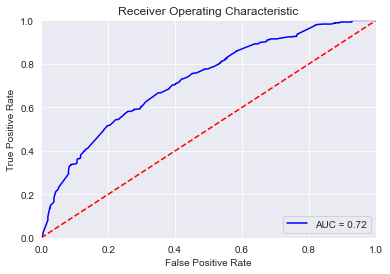

In [38]:
# Accuracy
print(f"Accuracy of the classifier is: {accuracy_score(y_test, predictions)}")

# Precision
from sklearn.metrics import precision_score
print(f"Precision Score of the classifier is: {precision_score(y_test, predictions)}")

# Recall
from sklearn.metrics import recall_score
print(f"Recall Score of the classifier is: {recall_score(y_test, predictions)}")

# Calculo del F1 score
from sklearn.metrics import f1_score
print(f"F1 Score of the classifier is: {f1_score(y_test, predictions)}")

#Template CURVA - ROC

from sklearn.metrics import roc_curve, auc

class_probabilities = model.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# AUC
print(f"AUC for our classifier is: {roc_auc}")

# Gráfica de la Curva ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Observaciones:
- Al modelo le cuesta detectar las clases (hay mucho falsos positivos y negativos).

## Gradient Boosting Classifier

In [39]:
from sklearn.ensemble import GradientBoostingClassifier

In [40]:
# Se definen X e y
X = BTC_ind_trend_2.drop (['Target'],axis=1)
y = BTC_ind_trend_2 ['Target']

# Dividimos los datos en Train y Test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [41]:
# Se crea el modelo Gradient Boosting Classifier
gbrt = GradientBoostingClassifier(random_state = 0)

Se contruye la grilla de RandomizedSearchCV.

In [42]:
# Se definelos hyperparámetros
param_grid = {'learning_rate':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'n_estimators':[100, 1000, 10000],
              'subsample':[0.00001, 0.0001, 0.001, 0.01, 0.1, 0.99],
              'criterion': ['squared_error'],
              'warm_start': [False, True]
              }

# Se uitiliza la RandomizedSearchCV y se agrega Cross validation con k=5 
model = RandomizedSearchCV(gbrt, param_grid, cv=5, verbose=2)

In [43]:
model.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END criterion=squared_error, learning_rate=100, n_estimators=100, subsample=0.99, warm_start=False; total time=   1.0s
[CV] END criterion=squared_error, learning_rate=100, n_estimators=100, subsample=0.99, warm_start=False; total time=   1.1s
[CV] END criterion=squared_error, learning_rate=100, n_estimators=100, subsample=0.99, warm_start=False; total time=   1.0s
[CV] END criterion=squared_error, learning_rate=100, n_estimators=100, subsample=0.99, warm_start=False; total time=   1.0s
[CV] END criterion=squared_error, learning_rate=100, n_estimators=100, subsample=0.99, warm_start=False; total time=   1.1s
[CV] END criterion=squared_error, learning_rate=1, n_estimators=10000, subsample=0.99, warm_start=False; total time=  30.0s
[CV] END criterion=squared_error, learning_rate=1, n_estimators=10000, subsample=0.99, warm_start=False; total time=  29.5s
[CV] END criterion=squared_error, learning_rate=1, n_estimators=10000, 

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=0),
                   param_distributions={'criterion': ['squared_error'],
                                        'learning_rate': [0.0001, 0.001, 0.01,
                                                          0.1, 1, 10, 100,
                                                          1000],
                                        'n_estimators': [100, 1000, 10000],
                                        'subsample': [1e-05, 0.0001, 0.001,
                                                      0.01, 0.1, 0.99],
                                        'warm_start': [False, True]},
                   verbose=2)

In [44]:
print("Mejores parametros: "+str(model.best_params_))
print("Mejor Score: "+str(model.best_score_)+'\n')

Mejores parametros: {'warm_start': False, 'subsample': 0.99, 'n_estimators': 1000, 'learning_rate': 0.01, 'criterion': 'squared_error'}
Mejor Score: 0.6679012345679013



In [45]:
#Veamos los resultados obtenidos
scores = pd.DataFrame(model.cv_results_)
scores.sort_values("mean_test_score", ascending=False).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
8      10.977861      0.134458         0.015618        0.000012   
1      29.988273      0.328190         0.031241        0.000001   
2       0.125389      0.012213         0.010172        0.006795   
5       0.130815      0.007202         0.000599        0.001197   
3       1.080647      0.003916         0.000000        0.000000   

  param_warm_start param_subsample param_n_estimators param_learning_rate  \
8            False            0.99               1000                0.01   
1            False            0.99              10000                   1   
2             True            0.01                100                  10   
5            False            0.01                100                  10   
3             True            0.99                100              0.0001   

  param_criterion  \
8   squared_error   
1   squared_error   
2   squared_error   
5   squared_error   
3   squared_error   

                                                                                                                params  \
8  {'warm_start': False, 'subsample': 0.99, 'n_estimators': 1000, 'learning_rate': 0.01, 'criterion': 'squared_error'}   
1    {'warm_start': False, 'subsample': 0.99, 'n_estimators': 10000, 'learning_rate': 1, 'criterion': 'squared_error'}   
2      {'warm_start': True, 'subsample': 0.01, 'n_estimators': 100, 'learning_rate': 10, 'criterion': 'squared_error'}   
5     {'warm_start': False, 'subsample': 0.01, 'n_estimators': 100, 'learning_rate': 10, 'criterion': 'squared_error'}   
3  {'warm_start': True, 'subsample': 0.99, 'n_estimators': 100, 'learning_rate': 0.0001, 'criterion': 'squared_error'}   

   split0_test_score  split1_test_score  split2_test_score  split3_test_score  \
8           0.672840           0.652778           0.641975           0.675926   
1           0.668210           0.629630           0.646605           0.662037   
2           0.507716           0.524691           0.594136           0.506173   
5           0.507716           0.524691           0.594136           0.506173   
3           0.507716           0.507716           0.509259           0.509259   

   split4_test_score  mean_test_score  std_test_score  rank_test_score  
8           0.695988         0.667901        0.018860                1  
1           0.654321         0.652160        0.013404                2  
2           0.436728         0.513889        0.050215                3  
5           0.436728         0.513889        0.050215                3  
3           0.509259         0.508642        0.000756                5

In [46]:
# Se ejecuta la predicción de resultados con X_test
predictions = model.predict(X_test)

In [47]:
# Accuracy
print('Accuracy:', accuracy_score(y_test, predictions))

Accuracy: 0.6666666666666666


In [48]:
cm = confusion_matrix(y_test,predictions)
print("Matriz de confusión:")
print(cm)

Matriz de confusión:
[[358 194]
 [166 362]]


Accuracy of the classifier is: 0.6666666666666666
Precision Score of the classifier is: 0.6510791366906474
Recall Score of the classifier is: 0.6856060606060606
F1 Score of the classifier is: 0.6678966789667896
AUC for our classifier is: 0.7316987812911727


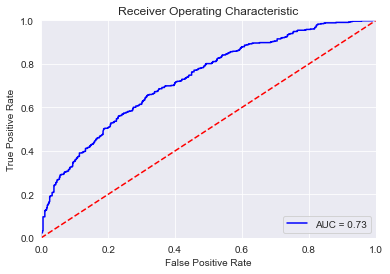

In [49]:
# Accuracy
print(f"Accuracy of the classifier is: {accuracy_score(y_test, predictions)}")

# Precision
from sklearn.metrics import precision_score
print(f"Precision Score of the classifier is: {precision_score(y_test, predictions)}")

# Recall
from sklearn.metrics import recall_score
print(f"Recall Score of the classifier is: {recall_score(y_test, predictions)}")

# Calculo del F1 score
from sklearn.metrics import f1_score
print(f"F1 Score of the classifier is: {f1_score(y_test, predictions)}")

#Template CURVA - ROC

from sklearn.metrics import roc_curve, auc

class_probabilities = model.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# AUC
print(f"AUC for our classifier is: {roc_auc}")

# Gráfica de la Curva ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Observaciones:
- Al modelo le cuesta detectar las clases (hay mucho falsos positivos y negativos).

## XG Boost

In [50]:
import xgboost as xgb

In [51]:
# Se definen X e y
X = BTC_ind_trend_2.drop (['Target'],axis=1)
y = BTC_ind_trend_2 ['Target']

# Dividimos los datos en Train y Test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [52]:
clf_xgb = xgb.XGBClassifier(objective='binary:logistic', n_estimators=1000,seed=123)

Se contruye la grilla de RandomizedSearchCV.

In [53]:
# Se definelos hyperparámetros
param_grid = {'booster':['gbtree', 'gblinear','dart', 'gbtree and dart'],
              'verbosity':[2],
              'validate_parameters':[True, False]
              }

# Se uitiliza la RandomizedSearchCV y se agrega Cross validation con k=5 
model = RandomizedSearchCV(clf_xgb, param_grid, cv=5, verbose=2)

In [54]:
model.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[15:39:32] INFO: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\tree\updater_prune.cc:101: tree pruning end, 80 extra nodes, 0 pruned nodes, max_depth=6
[15:39:32] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:39:32] INFO: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\tree\updater_prune.cc:101: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=6
[15:39:32] INFO: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\tree\updater_prune.cc:101: tree pruning end, 74 extra nodes, 0 pruned nodes, max_depth=6
[15:39:32] INFO: C:\Windows\Temp\abs_557yfx631l\c

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints...
                                           n_estimators=1000, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None,
                                           reg_alpha=None, reg_lambda=None,
                                           scale_pos_weight=None, seed=123,
                                           subsample=None, tree_method=None,
                                           validate_parameters=None,
                                           verbosity=None),
                   param_distributions={'booster': ['gbtree', 'gblinear',
                                                    'dart', 'gbtree and dart'],
                                        'validate_parameters': [True, False],
                                        'verbosity': [2]},
                   verbose=2)

In [55]:
print("Mejores parametros: "+str(model.best_params_))
print("Mejor Score: "+str(model.best_score_)+'\n')

Mejores parametros: {'verbosity': 2, 'validate_parameters': True, 'booster': 'gbtree'}
Mejor Score: 0.6558641975308642



In [56]:
#Veamos los resultados obtenidos
scores = pd.DataFrame(model.cv_results_)
scores.sort_values("mean_test_score", ascending=False).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       5.733005      0.084737         0.017064        0.002938   
1       5.671731      0.198082         0.009354        0.007637   
4     115.447233      1.281156         0.312245        0.009899   
5     114.173606      0.935563         0.311731        0.001370   
2       0.500221      0.011009         0.012498        0.006249   

  param_verbosity param_validate_parameters param_booster  \
0               2                      True        gbtree   
1               2                     False        gbtree   
4               2                      True          dart   
5               2                     False          dart   
2               2                      True      gblinear   

                                                                 params  \
0    {'verbosity': 2, 'validate_parameters': True, 'booster': 'gbtree'}   
1   {'verbosity': 2, 'validate_parameters': False, 'booster': 'gbtree'}   
4      {'verbosity': 2, 'validate_parameters': True, 'booster': 'dart'}   
5     {'verbosity': 2, 'validate_parameters': False, 'booster': 'dart'}   
2  {'verbosity': 2, 'validate_parameters': True, 'booster': 'gblinear'}   

   split0_test_score  split1_test_score  split2_test_score  split3_test_score  \
0           0.668210           0.620370           0.649691           0.663580   
1           0.668210           0.620370           0.649691           0.663580   
4           0.668210           0.620370           0.649691           0.663580   
5           0.668210           0.620370           0.649691           0.663580   
2           0.643519           0.614198           0.631173           0.600309   

   split4_test_score  mean_test_score  std_test_score  rank_test_score  
0           0.677469         0.655864        0.019883                1  
1           0.677469         0.655864        0.019883                1  
4           0.677469         0.655864        0.019883                1  
5           0.677469         0.655864        0.019883                1  
2           0.666667         0.631173        0.023035                5

In [57]:
# Se ejecuta la predicción de resultados con X_test
predictions = model.predict(X_test)

In [58]:
# Accuracy
print('Accuracy:', accuracy_score(y_test, predictions))

Accuracy: 0.6527777777777778


In [59]:
cm = confusion_matrix(y_test,predictions)
print("Matriz de confusión:")
print(cm)

Matriz de confusión:
[[343 209]
 [166 362]]


Accuracy of the classifier is: 0.6527777777777778
Precision Score of the classifier is: 0.6339754816112084
Recall Score of the classifier is: 0.6856060606060606
F1 Score of the classifier is: 0.6587807097361237
AUC for our classifier is: 0.712145229468599


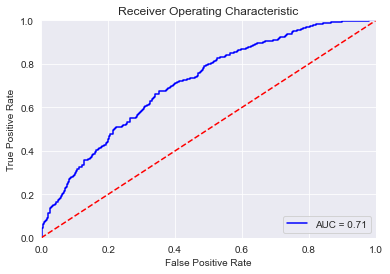

In [60]:
# Accuracy
print(f"Accuracy of the classifier is: {accuracy_score(y_test, predictions)}")

# Precision
from sklearn.metrics import precision_score
print(f"Precision Score of the classifier is: {precision_score(y_test, predictions)}")

# Recall
from sklearn.metrics import recall_score
print(f"Recall Score of the classifier is: {recall_score(y_test, predictions)}")

# Calculo del F1 score
from sklearn.metrics import f1_score
print(f"F1 Score of the classifier is: {f1_score(y_test, predictions)}")

#Template CURVA - ROC

from sklearn.metrics import roc_curve, auc

class_probabilities = model.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# AUC
print(f"AUC for our classifier is: {roc_auc}")

# Gráfica de la Curva ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Observaciones:
- Al modelo le cuesta detectar las clases (hay mucho falsos positivos y negativos). 

## LightGBM

In [61]:
import lightgbm as lgb

In [62]:
# Se definen X e y
X = BTC_ind_trend_2.drop (['Target'],axis=1)
y = BTC_ind_trend_2 ['Target']

# Dividimos los datos en Train y Test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [63]:
clf = lgb.LGBMClassifier()

Se contruye la grilla de RandomizedSearchCV.

In [64]:
# Se definelos hyperparámetros
param_grid = {'max_bin':[1, 255, 500, 750, 1000, 10000],
              'precise_float_parser': [True, False]}

# Se uitiliza la RandomizedSearchCV y se agrega Cross validation con k=5 
model = RandomizedSearchCV(clf, param_grid, cv=5, verbose=2)

In [65]:
model.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ............max_bin=1000, precise_float_parser=True; total time=   0.3s
[CV] END ............max_bin=1000, precise_float_parser=True; total time=   0.3s
[CV] END ............max_bin=1000, precise_float_parser=True; total time=   0.3s
[CV] END ............max_bin=1000, precise_float_parser=True; total time=   0.3s
[CV] END ............max_bin=1000, precise_float_parser=True; total time=   0.3s
[CV] END ............max_bin=255, precise_float_parser=False; total time=   0.1s
[CV] END ............max_bin=255, precise_float_parser=False; total time=   0.1s
[CV] END ............max_bin=255, precise_float_parser=False; total time=   0.1s
[CV] END ............max_bin=255, precise_float_parser=False; total time=   0.1s
[CV] END ............max_bin=255, precise_float_parser=False; total time=   0.1s
[CV] END .............max_bin=255, precise_float_parser=True; total time=   0.1s
[CV] END .............max_bin=255, precise_float

RandomizedSearchCV(cv=5, estimator=LGBMClassifier(),
                   param_distributions={'max_bin': [1, 255, 500, 750, 1000,
                                                    10000],
                                        'precise_float_parser': [True, False]},
                   verbose=2)

In [66]:
print("Mejores parametros: "+str(model.best_params_))
print("Mejor Score: "+str(model.best_score_)+'\n')

Mejores parametros: {'precise_float_parser': False, 'max_bin': 10000}
Mejor Score: 0.671604938271605



In [67]:
#Veamos los resultados obtenidos
scores = pd.DataFrame(model.cv_results_)
scores.sort_values("mean_test_score", ascending=False).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
6       0.405840      0.021794         0.001197        0.002394   
0       0.409238      0.008774         0.009241        0.005959   
9       0.446509      0.029414         0.006249        0.007653   
3       0.285676      0.011557         0.008470        0.006783   
7       0.313531      0.014987         0.010969        0.006232   

  param_precise_float_parser param_max_bin  \
6                      False         10000   
0                       True          1000   
9                      False          1000   
3                      False           500   
7                       True           500   

                                              params  split0_test_score  \
6  {'precise_float_parser': False, 'max_bin': 10000}           0.697531   
0    {'precise_float_parser': True, 'max_bin': 1000}           0.665123   
9   {'precise_float_parser': False, 'max_bin': 1000}           0.665123   
3    {'precise_float_parser': False, 'max_bin': 500}           0.663580   
7     {'precise_float_parser': True, 'max_bin': 500}           0.663580   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
6           0.623457           0.665123           0.680556           0.691358   
0           0.618827           0.665123           0.680556           0.695988   
9           0.618827           0.665123           0.680556           0.695988   
3           0.632716           0.660494           0.679012           0.688272   
7           0.632716           0.660494           0.679012           0.688272   

   mean_test_score  std_test_score  rank_test_score  
6         0.671605        0.026468                1  
0         0.665123        0.025823                2  
9         0.665123        0.025823                2  
3         0.664815        0.018986                4  
7         0.664815        0.018986                4

In [68]:
# Se ejecuta la predicción de resultados con X_test
predictions = model.predict(X_test)

In [69]:
# Accuracy
print('Accuracy:', accuracy_score(y_test, predictions))

Accuracy: 0.6675925925925926


In [70]:
cm = confusion_matrix(y_test,predictions)
print("Matriz de confusión:")
print(cm)

Matriz de confusión:
[[356 196]
 [163 365]]


Accuracy of the classifier is: 0.6675925925925926
Precision Score of the classifier is: 0.6506238859180036
Recall Score of the classifier is: 0.6912878787878788
F1 Score of the classifier is: 0.6703397612488522
AUC for our classifier is: 0.7316884881422925


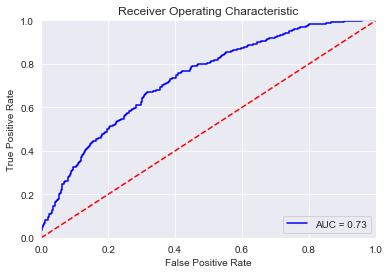

In [71]:
# Accuracy
print(f"Accuracy of the classifier is: {accuracy_score(y_test, predictions)}")

# Precision
from sklearn.metrics import precision_score
print(f"Precision Score of the classifier is: {precision_score(y_test, predictions)}")

# Recall
from sklearn.metrics import recall_score
print(f"Recall Score of the classifier is: {recall_score(y_test, predictions)}")

# Calculo del F1 score
from sklearn.metrics import f1_score
print(f"F1 Score of the classifier is: {f1_score(y_test, predictions)}")

#Template CURVA - ROC

from sklearn.metrics import roc_curve, auc

class_probabilities = model.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# AUC
print(f"AUC for our classifier is: {roc_auc}")

# Gráfica de la Curva ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Observaciones:
- Al modelo le cuesta detectar las clases (hay mucho falsos positivos y negativos). 

## HistGradientBoostingClassifier

In [72]:
from sklearn.ensemble import HistGradientBoostingClassifier

In [73]:
# Se definen X e y
X = BTC_ind_trend_2.drop (['Target'],axis=1)
y = BTC_ind_trend_2 ['Target']

# Dividimos los datos en Train y Test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [74]:
Dt = HistGradientBoostingClassifier().fit(X_train, y_train)

In [75]:
Dt.score(X_test, y_test)

0.6601851851851852

Se buscará hypertunear este modelo

In [76]:
HGBC = HistGradientBoostingClassifier()

Se contruye la grilla de RandomizedSearchCV.

In [77]:
# Se definelos hyperparámetros
param_grid = {'loss':['log_loss', 'auto', 'binary_crossentropyv', 'categorical_crossentropy'],
              'learning_rate':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'max_iter': [100,1000,10000],
              'max_leaf_nodes': [1,15,31,65,90,150],
              'l2_regularization': [0, 1, 5, 10, 50,100],
              'warm_start': [False]}

# Se uitiliza la RandomizedSearchCV y se agrega Cross validation con k=5 
model = RandomizedSearchCV(HGBC, param_grid, cv=5, verbose=2)

In [78]:
model.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END l2_regularization=0, learning_rate=1, loss=log_loss, max_iter=10000, max_leaf_nodes=150, warm_start=False; total time=  20.3s
[CV] END l2_regularization=0, learning_rate=1, loss=log_loss, max_iter=10000, max_leaf_nodes=150, warm_start=False; total time=  20.9s
[CV] END l2_regularization=0, learning_rate=1, loss=log_loss, max_iter=10000, max_leaf_nodes=150, warm_start=False; total time=  20.7s
[CV] END l2_regularization=0, learning_rate=1, loss=log_loss, max_iter=10000, max_leaf_nodes=150, warm_start=False; total time=  20.9s
[CV] END l2_regularization=0, learning_rate=1, loss=log_loss, max_iter=10000, max_leaf_nodes=150, warm_start=False; total time=  20.8s
[CV] END l2_regularization=100, learning_rate=0.0001, loss=log_loss, max_iter=1000, max_leaf_nodes=90, warm_start=False; total time=   6.5s
[CV] END l2_regularization=100, learning_rate=0.0001, loss=log_loss, max_iter=1000, max_leaf_nodes=90, warm_start=False; tot

RandomizedSearchCV(cv=5, estimator=HistGradientBoostingClassifier(),
                   param_distributions={'l2_regularization': [0, 1, 5, 10, 50,
                                                              100],
                                        'learning_rate': [0.0001, 0.001, 0.01,
                                                          0.1, 1, 10, 100,
                                                          1000],
                                        'loss': ['log_loss', 'auto',
                                                 'binary_crossentropyv',
                                                 'categorical_crossentropy'],
                                        'max_iter': [100, 1000, 10000],
                                        'max_leaf_nodes': [1, 15, 31, 65, 90,
                                                           150],
                                        'warm_start': [False]},
                   verbose=2)

In [79]:
print("Mejores parametros: "+str(model.best_params_))
print("Mejor Score: "+str(model.best_score_)+'\n')

Mejores parametros: {'warm_start': False, 'max_leaf_nodes': 15, 'max_iter': 100, 'loss': 'auto', 'learning_rate': 0.01, 'l2_regularization': 5}
Mejor Score: 0.671604938271605



In [80]:
#Veamos los resultados obtenidos
scores = pd.DataFrame(model.cv_results_)
scores.sort_values("mean_test_score", ascending=False).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
7       0.666196      0.004095         0.006248        0.007653   
3      19.325279      0.190388         0.084354        0.015931   
0      20.326356      0.207541         0.493835        0.035466   
1       7.353097      0.698959         0.059360        0.006248   
9       8.985244      0.135787         0.438553        0.014106   

  param_warm_start param_max_leaf_nodes param_max_iter param_loss  \
7            False                   15            100       auto   
3            False                   65           1000   log_loss   
0            False                  150          10000   log_loss   
1            False                   90           1000   log_loss   
9            False                   31          10000   log_loss   

  param_learning_rate param_l2_regularization  \
7                0.01                       5   
3                 0.1                     100   
0                   1                       0   
1              0.0001                     100   
9                1000                       1   

                                                                                                                                 params  \
7           {'warm_start': False, 'max_leaf_nodes': 15, 'max_iter': 100, 'loss': 'auto', 'learning_rate': 0.01, 'l2_regularization': 5}   
3     {'warm_start': False, 'max_leaf_nodes': 65, 'max_iter': 1000, 'loss': 'log_loss', 'learning_rate': 0.1, 'l2_regularization': 100}   
0       {'warm_start': False, 'max_leaf_nodes': 150, 'max_iter': 10000, 'loss': 'log_loss', 'learning_rate': 1, 'l2_regularization': 0}   
1  {'warm_start': False, 'max_leaf_nodes': 90, 'max_iter': 1000, 'loss': 'log_loss', 'learning_rate': 0.0001, 'l2_regularization': 100}   
9     {'warm_start': False, 'max_leaf_nodes': 31, 'max_iter': 10000, 'loss': 'log_loss', 'learning_rate': 1000, 'l2_regularization': 1}   

   split0_test_score  split1_test_score  split2_test_score  split3_test_score  \
7           0.675926           0.641975           0.649691           0.671296   
3           0.660494           0.634259           0.646605           0.672840   
0           0.641975           0.638889           0.635802           0.662037   
1           0.635802           0.629630           0.648148           0.646605   
9           0.641975           0.628086           0.632716           0.646605   

   split4_test_score  mean_test_score  std_test_score  rank_test_score  
7           0.719136         0.671605        0.026967                1  
3           0.672840         0.657407        0.015089                2  
0           0.665123         0.648765        0.012292                3  
1           0.665123         0.645062        0.012151                4  
9           0.668210         0.643519        0.013974                5

In [81]:
# Se ejecuta la predicción de resultados con X_test
predictions = model.predict(X_test)

In [82]:
# Accuracy
print('Accuracy:', accuracy_score(y_test, predictions))

Accuracy: 0.6537037037037037


In [83]:
cm = confusion_matrix(y_test,predictions)
print("Matriz de confusión:")
print(cm)

Matriz de confusión:
[[345 207]
 [167 361]]


Accuracy of the classifier is: 0.6537037037037037
Precision Score of the classifier is: 0.6355633802816901
Recall Score of the classifier is: 0.6837121212121212
F1 Score of the classifier is: 0.6587591240875913
AUC for our classifier is: 0.7228603974527887


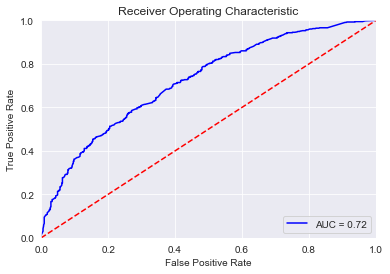

In [84]:
# Accuracy
print(f"Accuracy of the classifier is: {accuracy_score(y_test, predictions)}")

# Precision
from sklearn.metrics import precision_score
print(f"Precision Score of the classifier is: {precision_score(y_test, predictions)}")

# Recall
from sklearn.metrics import recall_score
print(f"Recall Score of the classifier is: {recall_score(y_test, predictions)}")

# Calculo del F1 score
from sklearn.metrics import f1_score
print(f"F1 Score of the classifier is: {f1_score(y_test, predictions)}")

#Template CURVA - ROC

from sklearn.metrics import roc_curve, auc

class_probabilities = model.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# AUC
print(f"AUC for our classifier is: {roc_auc}")

# Gráfica de la Curva ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Observaciones:
- Al modelo le cuesta detectar las clases (hay mucho falsos positivos y negativos). 

In [85]:
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score

In [86]:
BTC_ind_trend_2.columns

Index(['Price', 'Open', 'High', 'Low', 'Vol.', 'Percentage_diff', 'Target',
       'EMA_7d', 'HT_TRENDLINE', 'BBANDS_upper_band', 'BBANDS_middle_band',
       'BBANDS_lower_band', 'PSAR', 'Trend', 'Residuals', 'Comprar_EMA_7d_ET',
       'Mantener_posicion_EMA_7d_ET', 'Vender_EMA_7d_ET', 'Comprar_HTTL_ET',
       'Mantener_posicion_HTTL_ET', 'Vender_HTTL_ET', 'Comprar_PSAR_ET',
       'Mantener_posicion_PSAR_ET', 'Vender_PSAR_ET'],
      dtype='object')

In [87]:
BTC_ind_trend_3 = BTC_ind_trend_2 [['Price', 'Open', 'High', 'Low', 'Vol.', 'Percentage_diff',
       'EMA_7d', 'HT_TRENDLINE', 'BBANDS_upper_band', 'BBANDS_middle_band',
       'BBANDS_lower_band', 'PSAR', 'Trend', 'Residuals', 'Comprar_EMA_7d_ET',
       'Mantener_posicion_EMA_7d_ET', 'Vender_EMA_7d_ET', 'Comprar_HTTL_ET',
       'Mantener_posicion_HTTL_ET', 'Vender_HTTL_ET', 'Comprar_PSAR_ET',
       'Mantener_posicion_PSAR_ET', 'Vender_PSAR_ET', 'Target']].copy()

In [88]:
data = BTC_ind_trend_3.values

In [89]:
# Separacion en X e y
X, y = data[:, :-1], data[:, -1]
print(X.shape, y.shape)

(4320, 23) (4320,)


In [90]:
#Creamos el modelo 
cv = LeaveOneOut()

In [94]:
#Random Forest
model = HistGradientBoostingClassifier(verbose=2)

In [96]:
# Evaluacion del Modelo
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, verbose=1, n_jobs=-1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   15.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   56.8s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed: 11.7min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 15.2min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 19.2min
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed: 20.5min finished


In [97]:
from numpy import mean
from numpy import std
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.680 (0.466)
